In [ ]:
# This is a Heart Disease Prediction project
# We are going to predict whether someone has heart disease or not
# 1. Problem definition
# 2. Data
# 3. Evaluate
# 4. Feature
# 5. Modeling
# 6. Experimwentations
# dataset contains 303 rows and 14 columns

1. Problem definition
Based on given data predict whether someone has heart disease or not

2. Data 
We have loaded the data.

3. Evaluate We have to make sure model gives good accuracy

4. Features
What features are important.

5. Modelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [ ]:
df.isna().sum()    # Are there any missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

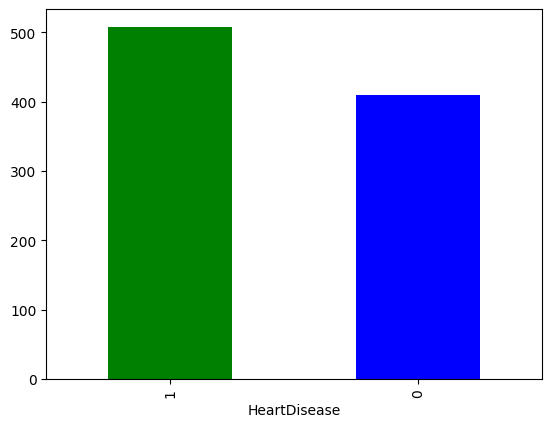

In [ ]:
df["HeartDisease"].value_counts().plot(kind = "bar", color=["green","blue"])
plt.show()

In [ ]:
df["Sex"] = df["Sex"].map({"M": 1, "F": 0})  # Map 'Sex' column: Male ('M') to 1, Female ('F') to 0 for ML model
df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0}) # Map 'ExerciseAngina' column: Yes ('Y') to 1, No ('N') to 0 for ML model

In [ ]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df["Sex"].value_counts()

Sex
1    725
0    193
Name: count, dtype: int64

In [ ]:
pd.crosstab(df.HeartDisease, df.Sex)    # More males have heart disease than females in this dataset.

Sex,0,1
HeartDisease,,
0,143,267
1,50,458


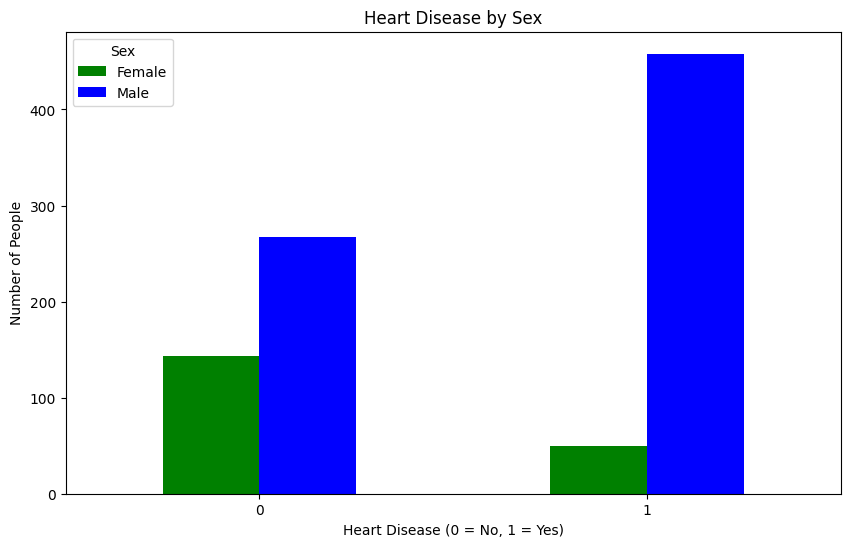

In [ ]:
pd.crosstab(df.HeartDisease, df.Sex).plot(kind = "bar", color = ["green", "blue"], figsize = (10,6))
plt.title("Heart Disease by Sex")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of People")
plt.legend(["Female", "Male"], title="Sex")
plt.xticks(rotation=0) 
plt.show()

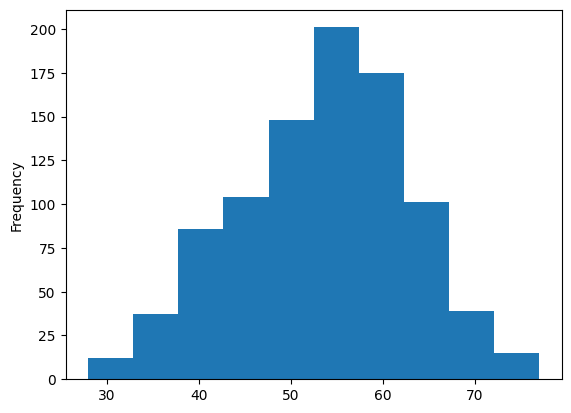

In [ ]:
# create histogram to see age distribution
df["Age"].plot.hist()
plt.show()

In [ ]:
pd.crosstab(df.HeartDisease, df.ChestPainType)

ChestPainType,ASY,ATA,NAP,TA
HeartDisease,,,,
0,104,149,131,26
1,392,24,72,20


In [ ]:
'''sns.countplot(x='target', data=df)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()'''

In [ ]:
# ASY: Asymptomatic (no typical chest pain)

# ATA: Atypical Angina (unusual chest pain)

# NAP: Non-Anginal Pain (pain not related to the heart)

# TA: Typical Angina (classic heart-related chest pain)

# Most people who show ASY (asymptomatic) actually have heart disease. 
# People with typical chest pains (TA) are about equally split. 
# ATA is usually seen in healthy people.

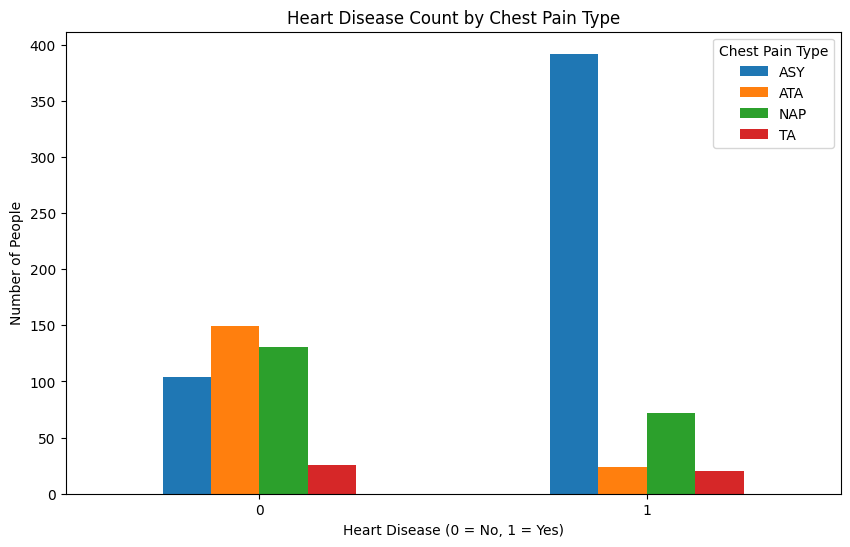

In [ ]:
pd.crosstab(df.HeartDisease, df.ChestPainType).plot(kind="bar", figsize=(10,6))

plt.title("Heart Disease Count by Chest Pain Type")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of People")
plt.legend(title="Chest Pain Type")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True)

In [ ]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


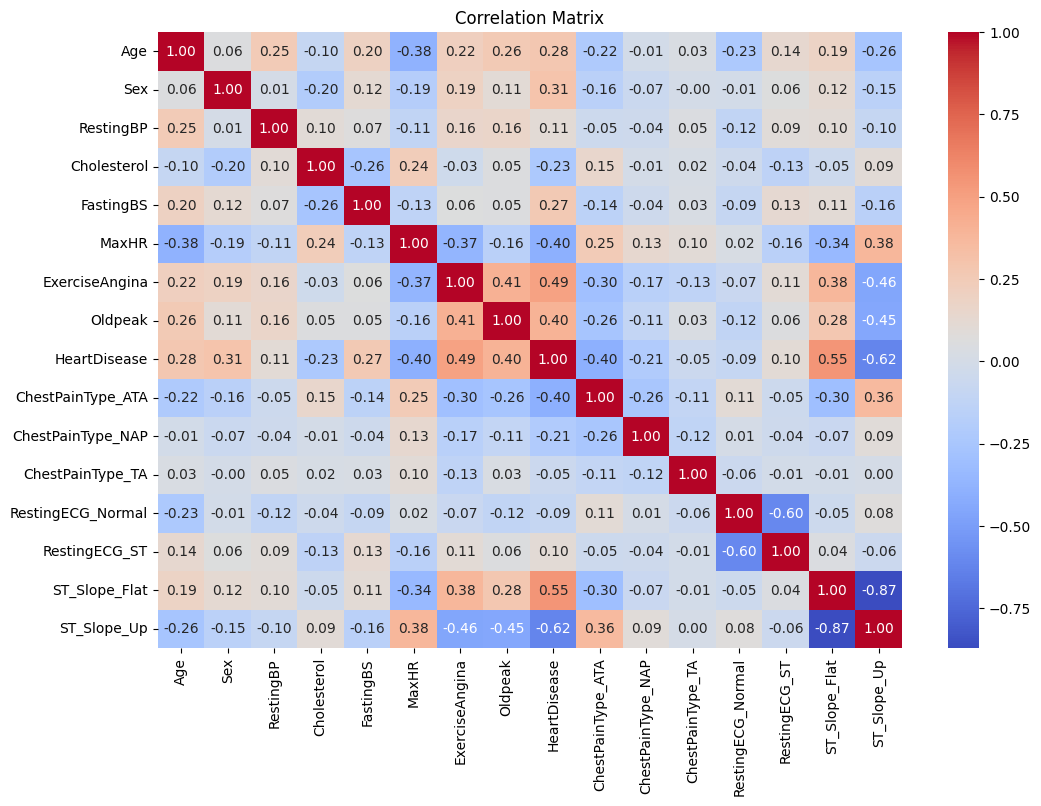

In [ ]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show() 

In [ ]:
# splitting data into features and labels
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

In [ ]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

The models we are going to use 
1)  K-Nearest Neighbour Classifier
2)  Logistic Regression
3)  Random Forest Classifier

In [ ]:
# putting models into a dictionary
models = {
    "KNN" : KNeighborsClassifier(),
    "LR" : LogisticRegression(random_state=42),
    "RFC" : RandomForestClassifier(random_state=42)
}
# create function to evaluate model
def fit_score(models, X_train, X_test, y_train, y_test):
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score 

In [ ]:
model_scores = fit_score(models = models,
                         X_train = X_train, 
                         X_test = X_test, 
                         y_train = y_train, 
                         y_test = y_test)

c:\Users\PMLS\Desktop\HeartDiseasePrediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_scores

{'KNN': 0.7065217391304348,
 'LR': 0.8478260869565217,
 'RFC': 0.8586956521739131}

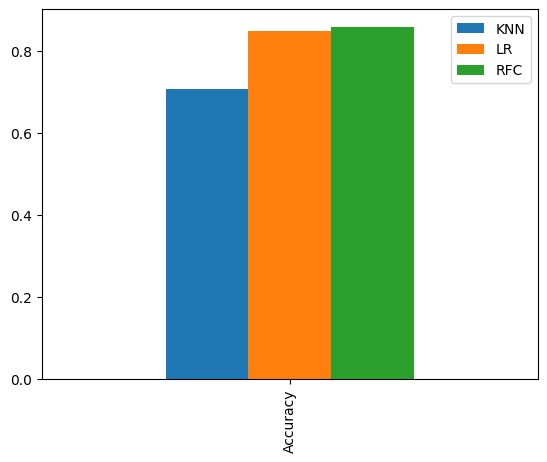

In [ ]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare.plot.bar()
plt.show()

Improving and tuning the model 

In [ ]:
train_score = []
test_score = []
# create range to be test for n neighbors
nneighbors = range(1, 30)
# KNN instance
KNN = KNeighborsClassifier()
# looping through range
for i in nneighbors:
    KNN.set_params(n_neighbors = i)
# run fit for ith value
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))


In [ ]:
train_score

[1.0,
 0.829700272479564,
 0.8201634877384196,
 0.7983651226158038,
 0.7956403269754768,
 0.776566757493188,
 0.784741144414169,
 0.7861035422343324,
 0.779291553133515,
 0.773841961852861,
 0.773841961852861,
 0.7683923705722071,
 0.7602179836512262,
 0.7520435967302452,
 0.7506811989100818,
 0.7370572207084468,
 0.7438692098092643,
 0.7356948228882834,
 0.7438692098092643,
 0.7343324250681199,
 0.7329700272479565,
 0.7356948228882834,
 0.728882833787466,
 0.726158038147139,
 0.7316076294277929,
 0.726158038147139,
 0.728882833787466,
 0.7275204359673024,
 0.7316076294277929]

In [ ]:
test_score

[0.6684782608695652,
 0.5978260869565217,
 0.657608695652174,
 0.6793478260869565,
 0.7065217391304348,
 0.6684782608695652,
 0.6630434782608695,
 0.6413043478260869,
 0.6684782608695652,
 0.6413043478260869,
 0.6521739130434783,
 0.6467391304347826,
 0.6739130434782609,
 0.6630434782608695,
 0.6630434782608695,
 0.6358695652173914,
 0.6630434782608695,
 0.6467391304347826,
 0.6630434782608695,
 0.6521739130434783,
 0.657608695652174,
 0.657608695652174,
 0.6739130434782609,
 0.6630434782608695,
 0.657608695652174,
 0.657608695652174,
 0.6521739130434783,
 0.657608695652174,
 0.6521739130434783]

We decided to drop using the KNN model as its accuracy was lower than the other models

Hyperparameter tuning using Randomized Search CV

In [ ]:
LR_hp = {
    "C": np.logspace(-4, 4, 20) ,
    "solver": ["liblinear"]
    
}

RFC_hp = {
    "n_estimators" : np.arange(10, 1600, 100) ,
    "max_depth" : [None, 3, 5, 6, 10] ,
    "min_samples_split" :np.arange(2, 20, 2) ,
    "min_samples_leaf" : np.arange(1, 20, 2)
}

Logistic Regression

In [ ]:
lr = RandomizedSearchCV(
    LogisticRegression(random_state = 42),
    param_distributions = LR_hp,
    n_iter = 20,
    cv = 5,
    verbose = True
)
lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...ndom_state=42)
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
lr.score(X_test, y_test)

0.8369565217391305

In [ ]:
lr.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

Random Forest Classifier

In [ ]:
rfc = RandomizedSearchCV(
    RandomForestClassifier(random_state = 42),
    param_distributions = RFC_hp,
    n_iter = 20,
    cv = 5,
    verbose = True,
    n_jobs=-1
)
rfc.fit(X_train, y_train)  

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ..., 1410, 1510])}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
rfc.score(X_test, y_test) 

0.8695652173913043

In [ ]:
rfc.best_params_

{'n_estimators': np.int64(810),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(1),
 'max_depth': 10}

After tuning, the Logistic Regression model’s accuracy slightly decreased from ~85% to ~83%, showing minimal improvement from hyperparameter search.
The Random Forest model’s accuracy improved from ~86% to ~86.4%, indicating a small positive effect of tuning.

Hyperparameter tuning using Grid Search CV

In [ ]:
lr_gs = GridSearchCV(
    LogisticRegression(random_state = 42),
    param_grid = LR_hp,
    cv = 5,
    verbose = True
)
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [ ]:
lr_gs.score(X_test, y_test)

0.8369565217391305

In [ ]:
# A smaller grid was used to make the tuning faster and more practical.
RFC_hp_changed = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [ ]:
rfc_gs = GridSearchCV(
    RandomForestClassifier(random_state = 42),
    param_grid = RFC_hp_changed,
    cv = 5,
    verbose = True,
    n_jobs=-1
)
rfc_gs.fit(X_train, y_train) 

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [ ]:
rfc_gs.score(X_test, y_test) 

0.875

In [ ]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

Using Grid Search, the Logistic Regression model’s accuracy remained about the same at ~83.7%,
while the Random Forest model improved slightly to ~87.5%.

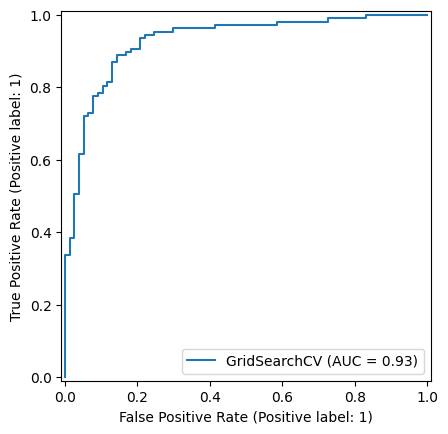

In [ ]:
# plotting area under the curve
y_pred = rfc_gs.predict(X_test)
RocCurveDisplay.from_estimator(rfc_gs, X_test, y_test)
plt.show()

In [ ]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[66 11]
 [12 95]]


In [ ]:
def plot_confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

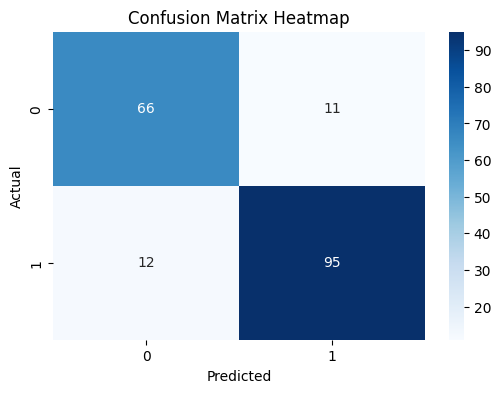

In [ ]:
plot_confusion_matrix_heatmap(y_test, y_pred)

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
rfc_gs.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
rfc = RandomForestClassifier(
 max_depth = None,
 min_samples_leaf = 1,
 min_samples_split= 10,
 n_estimators = 100,
random_state = 42
)

In [ ]:
# cross val accuracy
cv_acc = cross_val_score(rfc,
                        X,
                        y,
                        scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8256414825374196)

In [ ]:
# coss  val precision
cv_pre = cross_val_score(rfc,
                        X,
                        y,
                        scoring = "precision")
cv_pre = np.mean(cv_pre)
cv_pre

np.float64(0.8427904905502949)

In [ ]:
# coss  val recall
cv_rec = cross_val_score(rfc,
                        X,
                        y,
                        scoring = "precision")
cv_rec = np.mean(cv_rec)
cv_rec

np.float64(0.8427904905502949)

In [ ]:
# coss  val f1
cv_f1 = cross_val_score(rfc,
                        X,
                        y,
                        scoring = "precision")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8427904905502949)

Visualizing cross val matrix

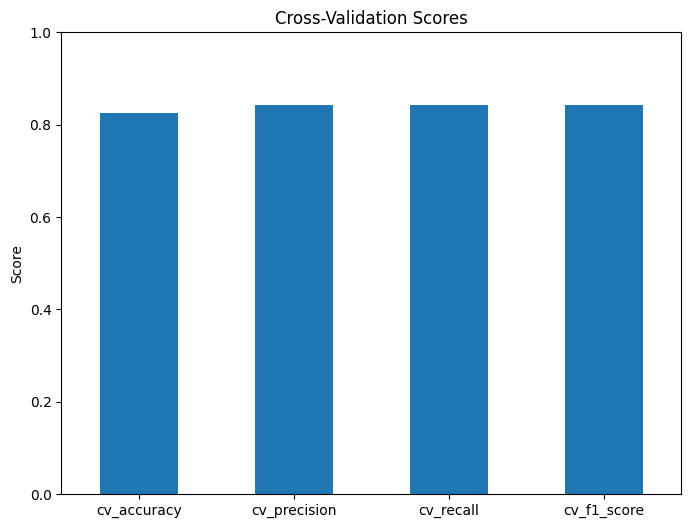

In [ ]:
cv_plot = pd.DataFrame(
    {
        "cv_accuracy": [cv_acc],
        "cv_precision": [cv_pre],
        "cv_recall": [cv_rec],
        "cv_f1_score": [cv_f1]
    }
)

import matplotlib.pyplot as plt

cv_plot.T.plot(kind='bar', legend=False, figsize=(8, 6))
plt.title("Cross-Validation Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

rfc_gs gave the best accuracy of 87.5%